### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import imblearn

### Load Data

In [2]:
data = pd.read_csv('loan_data.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Descriptive Statistics

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002051,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Data Cleaning

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Use mode values to impute categorical columns
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Use median values to impute the numerical columns
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

# Check if there any missing values
data.isnull().sum().sum()

0

c:\da\virtual\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\da\virtual\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\da\virtual\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


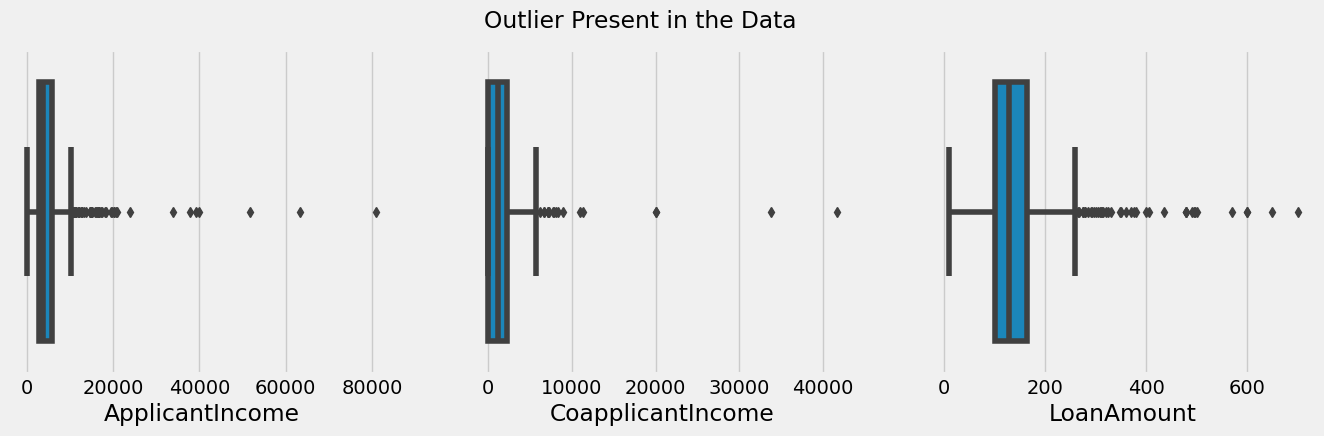

In [11]:
# Visualization of outliers using Box Plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outlier Present in the Data')
plt.show()

In [12]:
# Remove outliers from Applicant Income

# Check shape before removing outliers
print(f"Before removing outliers: {data.shape}")
# Filter the customers havin more than 2500 income
data = data[data['ApplicantIncome'] < 25000]
# Check shape after removing outliers
print(f"After removing outliers: {data.shape}")

Before removing outliers: (614, 13)
After removing outliers: (607, 13)


In [13]:
# Remove outliers from Coapplicant Income

# Check shape before removing outliers
print(f"Before removing outliers: {data.shape}")
# Filter the customers havin more than 2500 income
data = data[data['CoapplicantIncome'] < 10000]
# Check shape after removing outliers
print(f"After removing outliers: {data.shape}")

Before removing outliers: (607, 13)
After removing outliers: (601, 13)


In [14]:
# Remove outliers from Loan Amount

# Check shape before removing outliers
print(f"Before removing outliers: {data.shape}")
# Filter the customers havin more than 2500 income
data = data[data['LoanAmount'] < 400]
# Check shape after removing outliers
print(f"After removing outliers: {data.shape}")

Before removing outliers: (601, 13)
After removing outliers: (590, 13)


### EDA

#### Univariate Analysis

c:\da\virtual\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\da\virtual\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\da\virtual\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

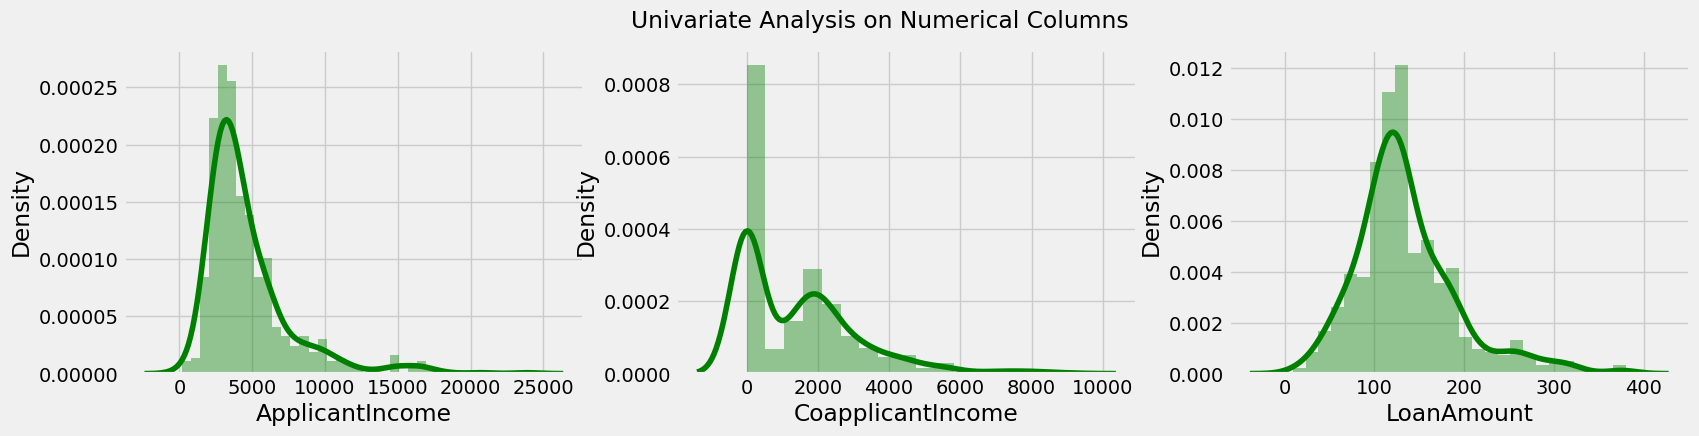

In [15]:
# Univariate analysis on Numerical Columns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (18, 4)

plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color= 'green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color= 'green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color= 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

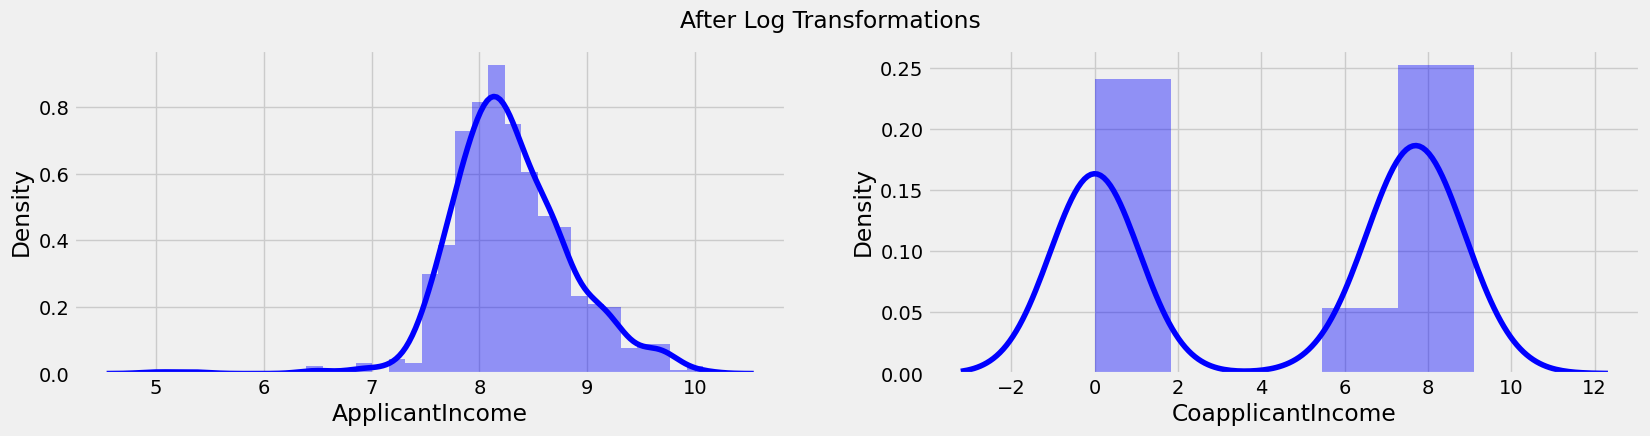

In [16]:
# Remove skewness from Applicant Income and Coapplicant Income
import warnings
warnings.filterwarnings('ignore')


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (18, 4)

data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1, 2, 1)
sns.distplot(data['ApplicantIncome'], color= 'blue')

plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'], color= 'blue')

plt.suptitle('After Log Transformations')
plt.show()

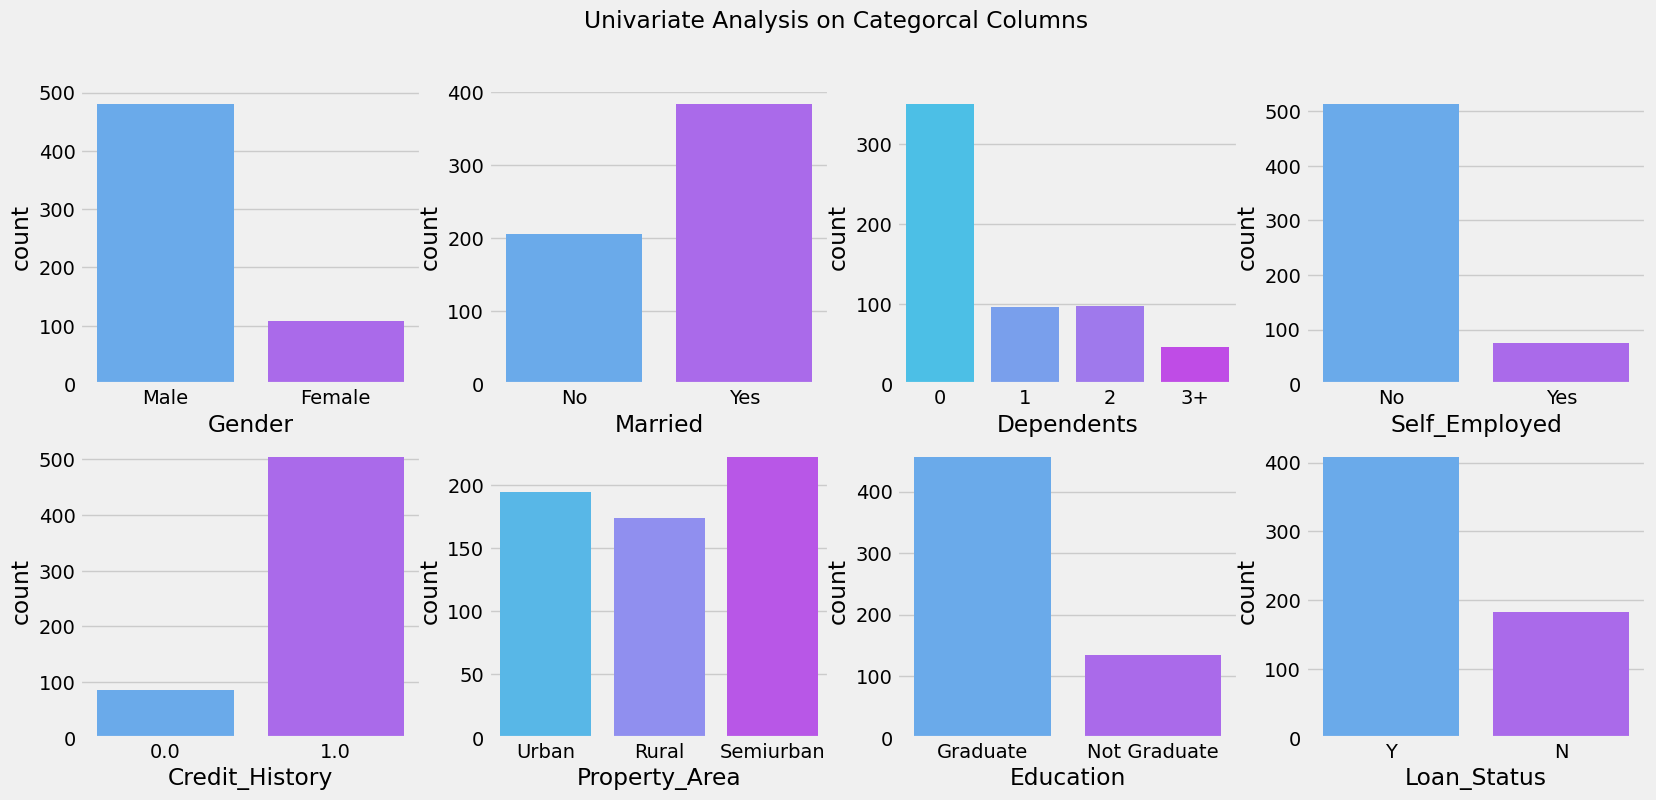

In [17]:
# Univarate Analysis on Cateorcal Columns

plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2, 4, 1)
sns.countplot(data['Gender'], palette= 'cool')

plt.subplot(2, 4, 2)
sns.countplot(data['Married'], palette= 'cool')

plt.subplot(2, 4, 3)
sns.countplot(data['Dependents'], palette= 'cool')

plt.subplot(2, 4, 4)
sns.countplot(data['Self_Employed'], palette= 'cool')

plt.subplot(2, 4, 5)
sns.countplot(data['Credit_History'], palette= 'cool')

plt.subplot(2, 4, 6)
sns.countplot(data['Property_Area'], palette= 'cool')

plt.subplot(2, 4, 7)
sns.countplot(data['Education'], palette= 'cool')

plt.subplot(2, 4, 8)
sns.countplot(data['Loan_Status'], palette= 'cool')


plt.suptitle('Univariate Analysis on Categorcal Columns')
plt.show()

#### Bivariate Analysis

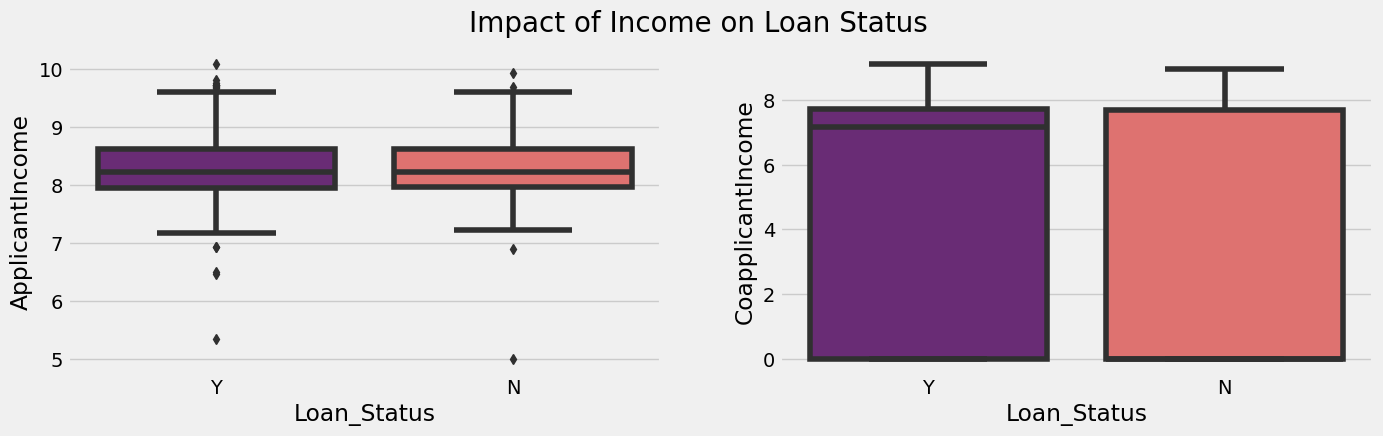

In [22]:
# Check the impact of applicat and Co-applicant on loan status
plt.rcParams['figure.figsize'] = (15, 4)
plt.subplot(1, 2, 1)
sns.boxplot(data['Loan_Status'], data['ApplicantIncome'], palette='magma')

plt.subplot(1, 2, 2)
sns.boxplot(data['Loan_Status'], data['CoapplicantIncome'], palette ='magma')
            
plt.suptitle('Impact of Income on Loan Status', fontsize =20)
plt.show()

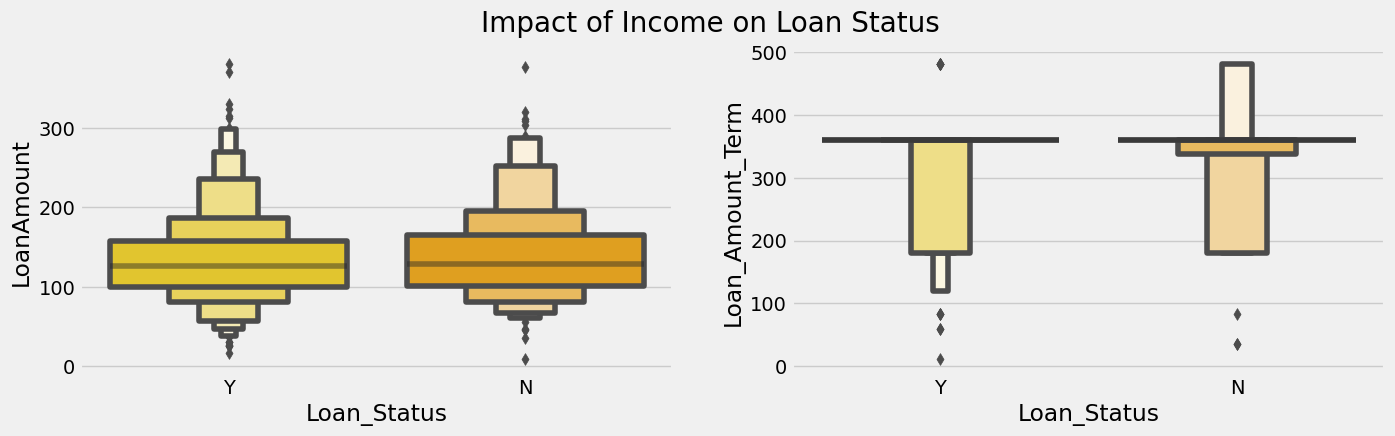

In [23]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.subplot(1, 2, 1)
sns.boxenplot(data['Loan_Status'], data['LoanAmount'], palette='Wistia')

plt.subplot(1, 2, 2)
sns.boxenplot(data['Loan_Status'], data['Loan_Amount_Term'], palette ='Wistia')
            
plt.suptitle('Impact of Income on Loan Status\n', fontsize =20)
plt.show()

In [24]:
# Comparin all categories with respect to Loan Status

print("Impact of Marriage on Loan Status")
print(pd.crosstab(data["Loan_Status"], data["Married"]))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(data["Loan_Status"], data["Dependents"]))
print('\n')

print("Impact of Education on Loan Status")
print(pd.crosstab(data["Loan_Status"], data["Education"]))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(data["Loan_Status"], data["Self_Employed"]))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(data["Loan_Status"], data["Property_Area"]))
print('\n')

Impact of Marriage on Loan Status
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129




### Data Preparation

In [15]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [16]:
# Delete the Loan ID column from data as this column has no relation with loan status
# Shape before deleting columns
print(f'Before Deleting Columns: {data.shape}')
data = data.drop(['Loan_ID'], axis=1)
# Shape after deleting columns
print(f'Before Deleting Columns: {data.shape}')


Before Deleting Columns: (590, 13)
Before Deleting Columns: (590, 12)


In [17]:
# Encode columns
data['Gender'] = data['Gender'].replace(('Male', 'Female'), (1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'), (1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'), (1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'), (1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'), (1,0))

# As seen above Urban and Semi-urban property have very similar impact on Loan status, we will encode them the same
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban','Rural'), (1,1,0))
# As seen above apart from 0 dependents, all have very similar impact on Loan status, we will encode them the same
data['Dependents'] = data['Dependents'].replace(('0', '1','2','3+'), (0,1,1,1))
#Check if any object column left
data.select_dtypes('object').columns

Index([], dtype='object')

In [18]:
# Split the Target columns from the Data
y = data['Loan_Status']
x= data.drop(['Loan_Status'], axis=1)

print(f'Shape of x: {x.shape}\nShape of y:{y.shape}')

Shape of x: (590, 11)
Shape of y:(590,)


### Resampling for Balancing Data

In [19]:
# Resampling is important here because the target class is highly imblanced
# Oversampling will be used in the case

from imblearn.over_sampling import SMOTE


x_resample, y_resample = SMOTE().fit_resample(x,y.values.ravel())

print(f'Shape of x: {x_resample.shape}\nShape of y:{y_resample.shape}')

Shape of x: (816, 11)
Shape of y:(816,)


In [20]:
# Value counts of target variable

print(f"Before Resampling:{y.value_counts()}")

y_sample = pd.DataFrame(y_resample)
print(f"After Resampling:{y_sample[0].value_counts()}")

Before Resampling:1    408
0    182
Name: Loan_Status, dtype: int64
After Resampling:0    408
1    408
Name: 0, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.2,random_state=0)
# Check shape
print(f'Shape of x Train:{x_train.shape}\nShape of y Train:{y_train.shape}\nShape of x Test:{x_test.shape}\nShape of y Test:{y_test.shape}\n ')

Shape of x Train:(652, 11)
Shape of y Train:(652,)
Shape of x Test:(164, 11)
Shape of y Test:(164,)
 


### Machine Learning Modelling

In [22]:
# App;y logistic regression
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

c:\da\virtual\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [24]:
y_pred = model.predict(x_test)
print(f"Training Accuracy:{model.score(x_train, y_train)}\nTesting Accuracy: {model.score(x_test, y_test)}")

Training Accuracy:0.7607361963190185
Testing Accuracy: 0.8109756097560976


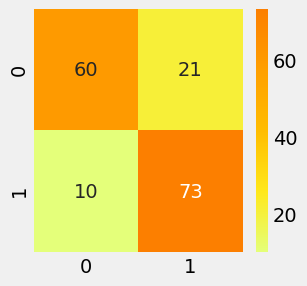

              precision    recall  f1-score   support

           0       0.86      0.74      0.79        81
           1       0.78      0.88      0.82        83

    accuracy                           0.81       164
   macro avg       0.82      0.81      0.81       164
weighted avg       0.82      0.81      0.81       164



In [25]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt ='.8g')
plt.show()
# Classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

In [26]:
# Apply Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
model_1 = GradientBoostingClassifier()
model_1.fit(x_train, y_train)

GradientBoostingClassifier()

In [28]:
y_pred1 = model_1.predict(x_test)
print(f"Training Accuracy:{model_1.score(x_train, y_train)}\nTesting Accuracy: {model_1.score(x_test, y_test)}")

Training Accuracy:0.9141104294478528
Testing Accuracy: 0.8170731707317073


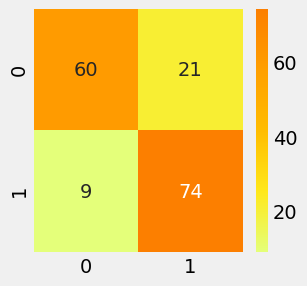

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        81
           1       0.78      0.89      0.83        83

    accuracy                           0.82       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.82      0.82      0.82       164



In [29]:
cm = confusion_matrix(y_test, y_pred1)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt ='.8g')
plt.show()
# Classification report for performance analysis
cr = classification_report(y_test, y_pred1)
print(cr)

In [30]:
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(random_state= 0)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print(scores)

[0.75757576 0.78787879 0.81538462 0.83076923 0.81538462 0.81538462
 0.78461538 0.75384615 0.8        0.81538462]
